In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score ,f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data from a csv
landmarks_df = pd.read_csv('dataset.csv')
landmarks_df

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x29,y29,x30,y30,x31,y31,x32,y32,x33,y33
0,annotated,259,120,267,108,271,108,275,108,252,...,123,595,486,597,126,606,524,610,109,626
1,Bow-Arrow,207,82,210,78,211,78,213,78,209,...,177,242,281,246,184,251,273,254,159,253
2,Bow-Arrow,231,84,240,72,245,72,250,71,229,...,133,501,494,504,148,520,480,517,81,529
3,Bow-Arrow,352,123,346,114,345,113,344,113,345,...,120,406,392,410,104,408,456,405,127,432
4,Bow-Arrow,172,179,181,164,183,164,186,164,179,...,90,637,642,657,112,673,636,694,30,670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Sitting,591,347,594,326,598,324,603,322,590,...,762,643,648,565,760,617,613,601,804,684
59,Sitting,303,120,301,100,302,100,301,99,293,...,356,547,33,521,351,578,51,565,479,584
60,Sitting,278,83,286,64,289,64,292,63,284,...,535,527,249,585,551,504,157,591,543,587
61,Taijiquan,389,116,398,100,402,100,408,101,381,...,272,680,461,680,277,691,479,731,267,735


In [3]:
# Check for White Spaces
landmarks_df.columns = landmarks_df.columns.str.strip()

In [4]:
landmarks_df['label'].value_counts()

label
Horse stance          39
Bow-Arrow             12
Sitting                6
Mountain Climbing      2
annotated              1
Golden Rooster         1
Taijiquan              1
Tame                   1
Name: count, dtype: int64

## Train & Evaluate Models

In [5]:
# Setup the testing and training sets
X = landmarks_df.drop('label', axis=1)
y = landmarks_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(42, 66) (42,) (21, 66) (21,)


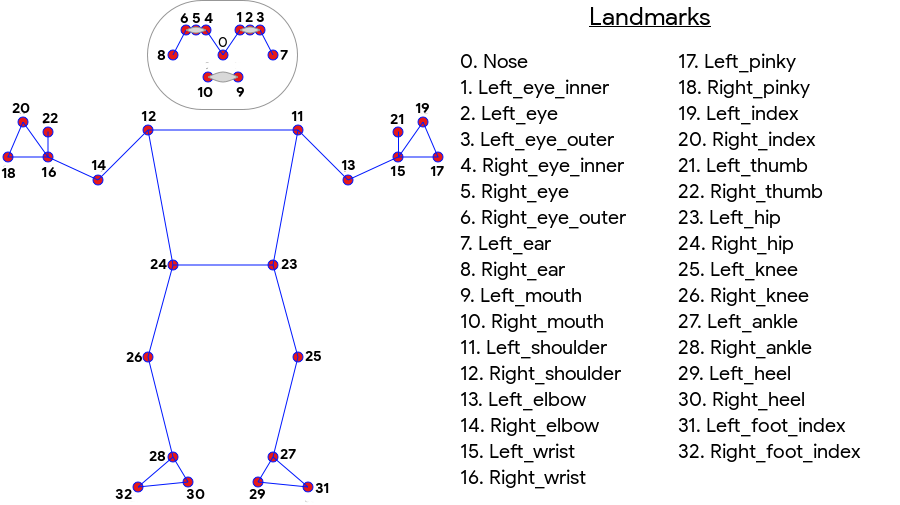

In [6]:
from IPython.display import Image

Image(filename='33 landmarks.png') 

### Horse Stance

In [15]:
# Check for White Spaces
landmarks_df = landmarks_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\john\AppData\Local\Temp\ipykernel_8788\2016222240.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  landmarks_df = landmarks_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [16]:
unique_labels = landmarks_df['label'].unique()
print(unique_labels)


['annotated' 'Bow-Arrow' 'Golden Rooster' 'Horse stance'
 'Mountain Climbing' 'Sitting' 'Taijiquan' 'Tame']


In [17]:
def calculate_angles_for_label(landmarks_df, label):
    # Filter the DataFrame to select rows with the specific label
    label_df = landmarks_df[landmarks_df['label'] == label]

    if label_df.empty:
        print(f"No data found for the '{label}' stance in your dataset.")
        return

    for index, row in label_df.iterrows():
        # Extract x and y coordinates for each landmark
        landmark_coordinates = [row[f'x{i}'] for i in range(1, 34)] + [row[f'y{i}'] for i in range(1, 34)]

        # Define the indices of the landmarks you want to use for angle calculation
        ankle_index = 0  # Adjust the index for the ankle landmark (e.g., 0 to 32)
        knee_index = 1  # Adjust the index for the knee landmark (e.g., 1 to 33)
        hip_index = 2  # Adjust the index for the hip landmark (e.g., 2 to 34)
        shoulder_index = 3  # Adjust the index for the shoulder landmark (e.g., 3 to 35)

        # Extract the landmark coordinates
        ankle_x, ankle_y = landmark_coordinates[ankle_index], landmark_coordinates[ankle_index + 33]
        knee_x, knee_y = landmark_coordinates[knee_index], landmark_coordinates[knee_index + 33]
        hip_x, hip_y = landmark_coordinates[hip_index], landmark_coordinates[hip_index + 33]
        shoulder_x, shoulder_y = landmark_coordinates[shoulder_index], landmark_coordinates[shoulder_index + 33]

        # Calculate the angles
        angle_ankle_knee_hip = math.degrees(math.atan2(hip_y - knee_y, hip_x - knee_x) - math.atan2(ankle_y - knee_y, ankle_x - knee_x))
        angle_knee_hip_shoulder = math.degrees(math.atan2(shoulder_y - hip_y, shoulder_x - hip_x) - math.atan2(knee_y - hip_y, knee_x - hip_x))
        angle_hip_shoulder_knee = math.degrees(math.atan2(ankle_y - knee_y, ankle_x - knee_x) - math.atan2(shoulder_y - hip_y, shoulder_x - hip_x))

        print(f"Row Index: {index}")
        print(f"Angle between ankle, knee, and hip: {angle_ankle_knee_hip} degrees")
        print(f"Angle between hip, shoulder, andhuman land knee: {angle_knee_hip_shoulder} degrees")
        print(f"Angle between shoulder, knee, and ankle: {angle_hip_shoulder_knee} degrees")
        print()

# Example usage:
label_name = 'Horse stance'  # Replace with the label name you want to calculate angles for
calculate_angles_for_label(landmarks_df, label_name)


Row Index: 14
Angle between ankle, knee, and hip: -116.56505117707799 degrees
Angle between hip, shoulder, and knee: -161.565051177078 degrees
Angle between shoulder, knee, and ankle: 98.13010235415598 degrees

Row Index: 15
Angle between ankle, knee, and hip: -124.99202019855868 degrees
Angle between hip, shoulder, and knee: -165.96375653207352 degrees
Angle between shoulder, knee, and ankle: 110.9557767306322 degrees

Row Index: 16
Angle between ankle, knee, and hip: -123.69006752597979 degrees
Angle between hip, shoulder, and knee: -165.96375653207352 degrees
Angle between shoulder, knee, and ankle: 109.65382405805329 degrees

Row Index: 17
Angle between ankle, knee, and hip: -132.87890360333856 degrees
Angle between hip, shoulder, and knee: -168.69006752597977 degrees
Angle between shoulder, knee, and ankle: 121.56897112931833 degrees

Row Index: 18
Angle between ankle, knee, and hip: -122.47119229084849 degrees
Angle between hip, shoulder, and knee: -180.0 degrees
Angle between sh

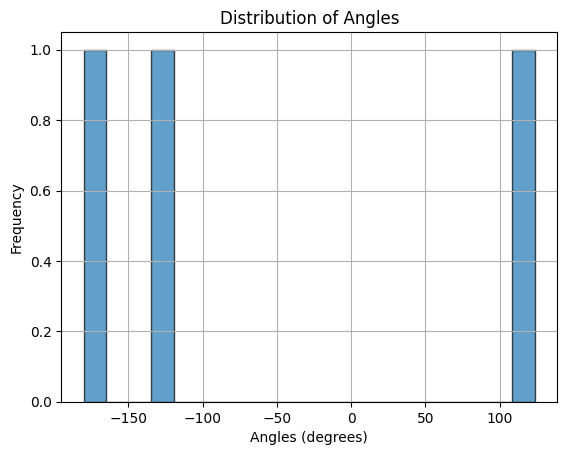

In [18]:
import matplotlib.pyplot as plt

# Assuming you have a list of angles (angle_ankle_knee_hip, angle_knee_hip_shoulder, angle_hip_shoulder_knee)
angles = [angle_ankle_knee_hip, angle_knee_hip_shoulder, angle_hip_shoulder_knee]

# Create a histogram
plt.hist(angles, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Angles (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Angles')
plt.grid(True)
plt.show()


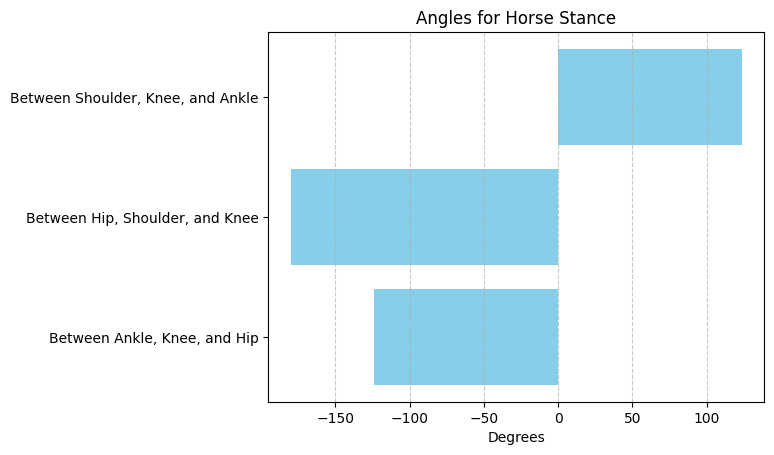

In [20]:
import matplotlib.pyplot as plt

# Replace these with the actual angles for your Horse Stance
angles = [angle_ankle_knee_hip, angle_knee_hip_shoulder, angle_hip_shoulder_knee]

# Define the names of the angles
angle_names = ['Between Ankle, Knee, and Hip', 'Between Hip, Shoulder, and Knee', 'Between Shoulder, Knee, and Ankle']

# Create a horizontal bar plot
plt.barh(angle_names, angles, color='skyblue')
plt.xlabel('Degrees')
plt.title('Angles for Horse Stance')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
